# Postprocessing : YT, power spectrum, halo mass function

I assume that you have successfully installed 
-yt (`conda install --channel conda-forge yt`), [install guide](https://yt-project.org/doc/installing.html)
-yt-astro-analysis (`conda install -c conda-forge yt-astro-analysis`), [install guide](https://yt-astro-analysis.readthedocs.io/en/latest/Installation.html)
-Pylians (`python -m pip install Pylians`), [install guide](https://pylians3.readthedocs.io/en/master/installation.html)
-colossus (`pip install colossus`), [install guide](https://bdiemer.bitbucket.io/colossus/installation.html)

We will use:
- HaloStats.py (routine to calculate Halo Mass Function)
- CLASS.dat and CLASS_NL.dat (linear and non-linear power spectrum from CLASS)

In [ ]:
import numpy as np #yeah, you also need numpy, scipy and matplotlib
from scipy import interpolate

import yt
from yt.extensions.astro_analysis.halo_analysis import HaloCatalog

import density_field_library as DFL
import Pk_library as PKL
import MAS_library as MASL

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

import mass_function_library as MFL
from HaloStats import halo_MF
from colossus.cosmology import cosmology
from colossus.lss import mass_function
cosmology.setCosmology('planck18')

In [32]:
%cd
%cd /content
ds=yt.load('ramses/output_00002/info_00002.txt') #load data

/root
/content


yt : [INFO     ] 2023-06-05 13:39:52,574 Parameters: current_time              = 0.952072483396015
yt : [INFO     ] 2023-06-05 13:39:52,577 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-06-05 13:39:52,580 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-05 13:39:52,583 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-06-05 13:39:52,586 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-05 13:39:52,588 Parameters: current_redshift          = -0.005378521683417348
yt : [INFO     ] 2023-06-05 13:39:52,591 Parameters: omega_lambda              = 0.690021097660065
yt : [INFO     ] 2023-06-05 13:39:52,594 Parameters: omega_matter              = 0.309899985790253
yt : [INFO     ] 2023-06-05 13:39:52,595 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-06-05 13:39:52,596 Parameters: hubble_constant           = 0.677419967651367


In [33]:
ds.parameters #get some info on the simulation

{'HydroMethod': 'ramses',
 'Time': 1.0,
 'ncpu': 1,
 'ndim': 3,
 'levelmin': 6,
 'levelmax': 12,
 'ngridmax': 2000000,
 'nstep_coarse': 72,
 'boxlen': 1.0,
 'time': 0.00542942788593571,
 'aexp': 1.00540760661284,
 'H0': 67.7419967651367,
 'omega_m': 0.309899985790253,
 'omega_l': 0.690021097660065,
 'omega_k': 7.89165496826172e-05,
 'omega_b': 0.0,
 'unit_l': 9.14249808758359e+26,
 'unit_d': 2.63068527085519e-30,
 'unit_t': 4.59596863306809e+17,
 'ordering type': 'hilbert',
 'namelist': "An error occurred when reading the namelist: No module named 'f90nml'\nSomething went wrong while trying to lazy-import f90nml. Please make sure that f90nml is properly installed.\nIf the problem persists, please file an issue at https://github.com/yt-project/yt/issues/new"}

In [37]:
ds.print_stats()

level	       # cells	     # cells^3
--------------------------------------
  0	             0	             0
  1	             1	             1
  2	             8	             2
  3	            64	             4
  4	           512	             8
  5	          4096	            16
  6	         32768	            32
  7	         93965	            46
  8	         65919	            41
  9	         25574	            30
 10	          3988	            16
 11	           189	             6
 12	             0	             0
----------------------------------------------
   	        227084


z = -0.00537852
t = 9.52072483e-01 code_time = 4.37569527e+17 s s = 1.38657416e+10 yr years

Smallest Cell:
	Width: 1.447e-01 Mpc
	Width: 1.447e+05 pc
	Width: 2.984e+10 AU
	Width: 4.464e+23 cm


In [40]:
for i in sorted(ds.field_list):
  print(i)

('all', 'particle_family')
('all', 'particle_identity')
('all', 'particle_level')
('all', 'particle_mass')
('all', 'particle_position_x')
('all', 'particle_position_y')
('all', 'particle_position_z')
('all', 'particle_tag')
('all', 'particle_velocity_x')
('all', 'particle_velocity_y')
('all', 'particle_velocity_z')
('gravity', 'Potential')
('gravity', 'x-acceleration')
('gravity', 'y-acceleration')
('gravity', 'z-acceleration')
('io', 'particle_family')
('io', 'particle_identity')
('io', 'particle_level')
('io', 'particle_mass')
('io', 'particle_position_x')
('io', 'particle_position_y')
('io', 'particle_position_z')
('io', 'particle_tag')
('io', 'particle_velocity_x')
('io', 'particle_velocity_y')
('io', 'particle_velocity_z')
('nbody', 'particle_family')
('nbody', 'particle_identity')
('nbody', 'particle_level')
('nbody', 'particle_mass')
('nbody', 'particle_position_x')
('nbody', 'particle_position_y')
('nbody', 'particle_position_z')
('nbody', 'particle_tag')
('nbody', 'particle_ve

In [35]:
print("\n".join(list(str(v) for v in ds.derived_field_list if v[0] in ("ramses", "io"))))

('io', 'mesh_id')
('io', 'particle_angular_momentum')
('io', 'particle_angular_momentum_magnitude')
('io', 'particle_angular_momentum_x')
('io', 'particle_angular_momentum_y')
('io', 'particle_angular_momentum_z')
('io', 'particle_family')
('io', 'particle_identity')
('io', 'particle_index')
('io', 'particle_level')
('io', 'particle_mass')
('io', 'particle_ones')
('io', 'particle_position')
('io', 'particle_position_cylindrical_radius')
('io', 'particle_position_cylindrical_theta')
('io', 'particle_position_cylindrical_z')
('io', 'particle_position_relative_x')
('io', 'particle_position_relative_y')
('io', 'particle_position_relative_z')
('io', 'particle_position_spherical_phi')
('io', 'particle_position_spherical_radius')
('io', 'particle_position_spherical_theta')
('io', 'particle_position_x')
('io', 'particle_position_y')
('io', 'particle_position_z')
('io', 'particle_radial_velocity')
('io', 'particle_radius')
('io', 'particle_specific_angular_momentum')
('io', 'particle_specific_a

In [42]:
#access data
ad = ds.all_data()
print(ad[('all', 'particle_position_x')])
print(ad[('gravity', 'Potential')])

[0.01217152 0.50632372 0.99540629 ... 0.98481533 0.47927772 0.9818736 ] code_length
[ 1.90431067e-04 -1.10854409e-04  4.08520202e-04 ...  8.28091308e-05
  6.18683763e-04  3.42667806e-04] code_velocity**2


yt : [INFO     ] 2023-06-05 13:35:52,001 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-06-05 13:35:52,008 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-06-05 13:35:52,022 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-06-05 13:35:52,031 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-06-05 13:35:52,039 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'



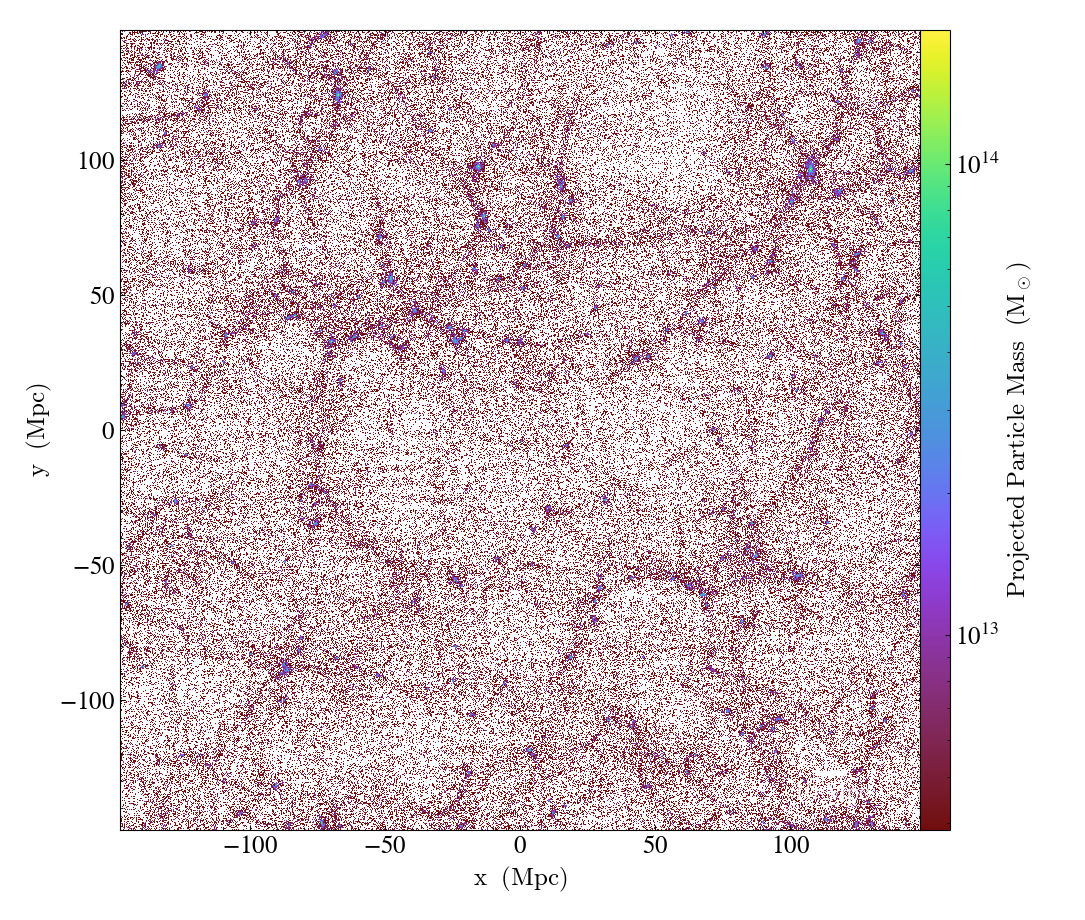

In [18]:
#plot
q = yt.ParticlePlot(ds, 'particle_position_x', 'particle_position_y','particle_mass')
q.set_unit('particle_mass', 'Msun')
#q.zoom(32)
#q.annotate_timestamp(corner='upper_left', time=True, redshift=False, draw_inset_box=True,time_format='t = {time:.1f}', time_unit='code_time')
q.annotate_scale()
q.show()
#q.save()


yt : [INFO     ] 2023-06-05 13:49:41,472 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-06-05 13:49:41,479 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-06-05 13:49:41,491 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-06-05 13:49:41,498 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-06-05 13:49:41,506 Making a fixed resolution buffer of (('gravity', 'Potential')) 800 by 800



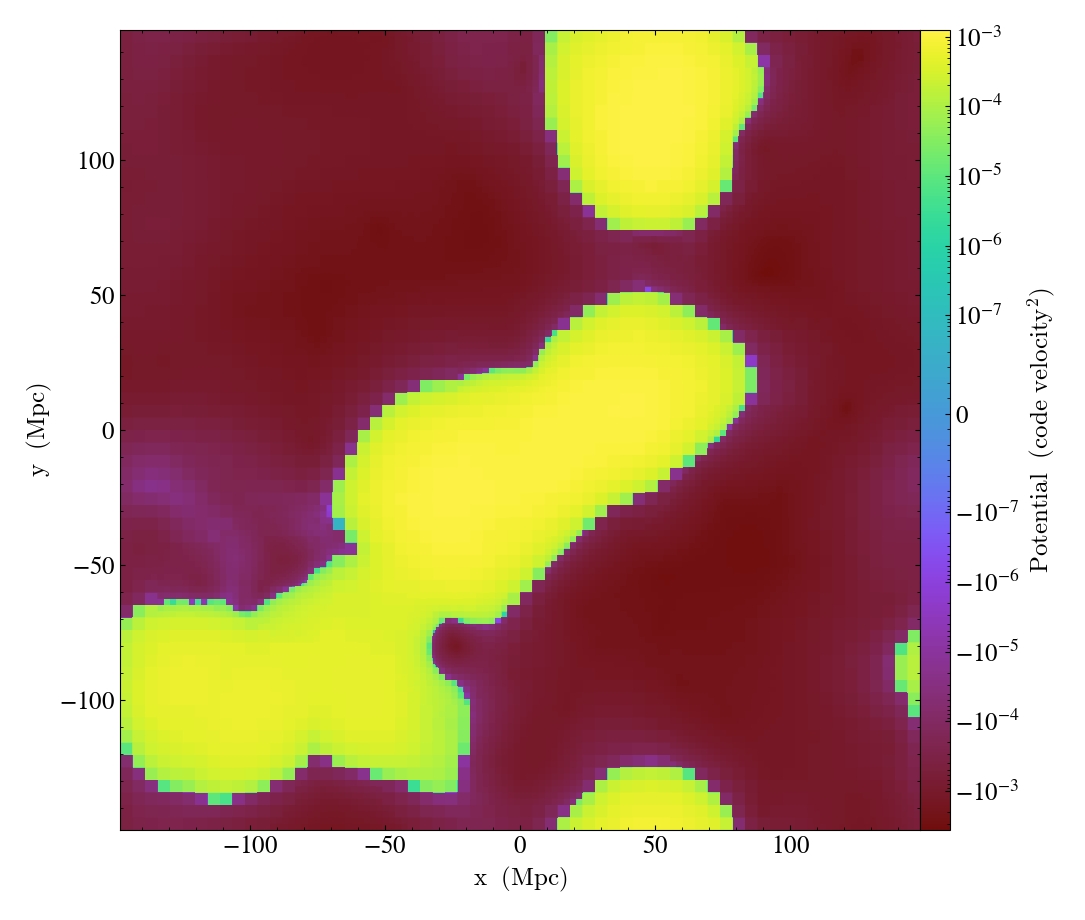

In [44]:
q1 = yt.SlicePlot(ds, "z",('gravity', 'Potential'))
q1


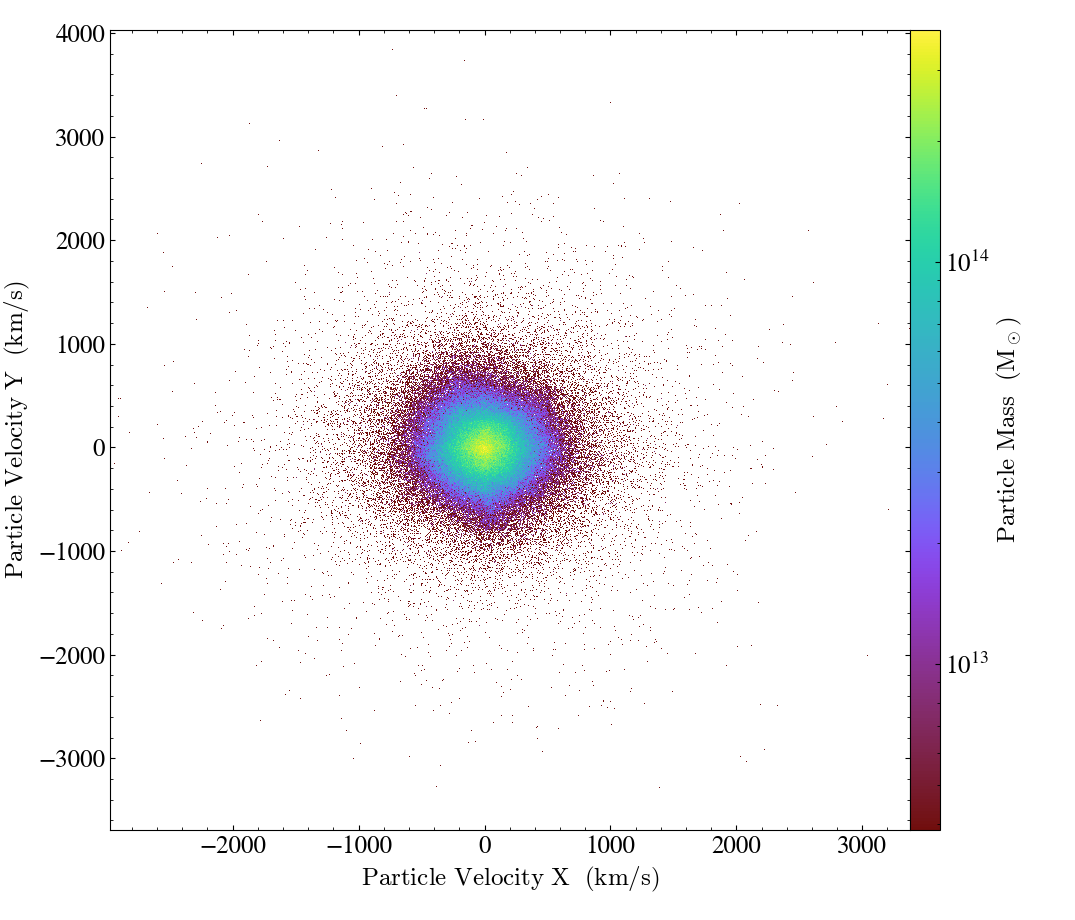

In [19]:
p = yt.ParticlePlot(ds, 'particle_velocity_x', 'particle_velocity_y','particle_mass')
p.set_unit('particle_velocity_x', 'km/s')
p.set_unit('particle_velocity_y', 'km/s')
p.set_unit('particle_mass', 'Msun')
p.show()

Power spectrum

In [20]:
%cd
%cd /content
ds=yt.load('ramses/output_00002/info_00002.txt')

grid              = 64    #grid size, to be adapted !!
pBoxSize           = ds.domain_width.in_units('Mpc/h') #Mpc/h
BoxSize            =pBoxSize[0].value #Mpc/h
Rayleigh_sampling = 1     #whether sampling the Rayleigh distribution for modes amplitudes
threads           = 1      #number of openmp threads
verbose           = True   #whether to print some information
axis=0
MAS='CIC'

/root
/content


yt : [INFO     ] 2023-06-05 13:36:09,207 Parameters: current_time              = 0.952072483396015
yt : [INFO     ] 2023-06-05 13:36:09,209 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-06-05 13:36:09,212 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-05 13:36:09,218 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-06-05 13:36:09,221 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-05 13:36:09,223 Parameters: current_redshift          = -0.005378521683417348
yt : [INFO     ] 2023-06-05 13:36:09,226 Parameters: omega_lambda              = 0.690021097660065
yt : [INFO     ] 2023-06-05 13:36:09,227 Parameters: omega_matter              = 0.309899985790253
yt : [INFO     ] 2023-06-05 13:36:09,230 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-06-05 13:36:09,232 Parameters: hubble_constant           = 0.677419967651367


In [21]:
ad=ds.all_data()
pos = ad['particle_position'].astype(np.float32)*BoxSize

# define 3D density fields
delta = np.zeros((grid,grid,grid), dtype=np.float32)

# construct 3D density field
MASL.MA(pos.astype(np.float32), delta, BoxSize, MAS, verbose=verbose)

# at this point, delta contains the effective number of particles in each voxel
# now compute overdensity and density constrast
delta /= np.mean(delta, dtype=np.float64);  delta -= 1.0


yt : [WARNING  ] 2023-06-05 13:36:13,236 This output has no cooling fields
yt : [WARNING  ] 2023-06-05 13:36:13,581 The DM particle filter already exists. Overriding.
yt : [WARNING  ] 2023-06-05 13:36:13,583 The star particle filter already exists. Overriding.
yt : [WARNING  ] 2023-06-05 13:36:13,585 The cloud particle filter already exists. Overriding.
yt : [WARNING  ] 2023-06-05 13:36:13,589 The dust particle filter already exists. Overriding.
yt : [WARNING  ] 2023-06-05 13:36:13,591 The star_tracer particle filter already exists. Overriding.
yt : [WARNING  ] 2023-06-05 13:36:13,594 The cloud_tracer particle filter already exists. Overriding.
yt : [WARNING  ] 2023-06-05 13:36:13,595 The dust_tracer particle filter already exists. Overriding.
yt : [WARNING  ] 2023-06-05 13:36:13,596 The gas_tracer particle filter already exists. Overriding.
yt : [INFO     ] 2023-06-05 13:36:13,598 Adding particle_type: DM
yt : [INFO     ] 2023-06-05 13:36:13,626 Adding particle_type: star
yt : [INFO  


Using CIC mass assignment scheme
Time taken = 0.010 seconds




Computing power spectrum of the field...
Time to complete loop = 0.02
Time taken = 0.04 seconds


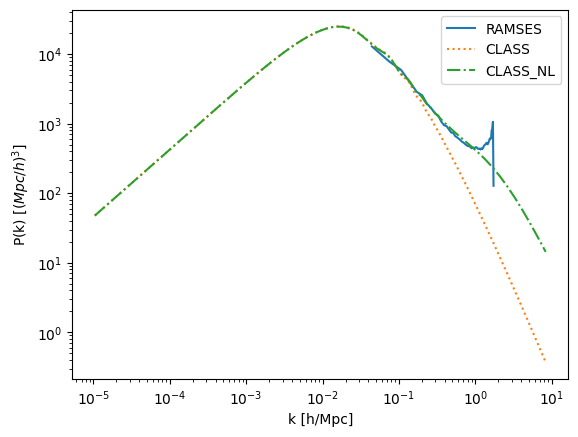

In [22]:
Pk = PKL.Pk(delta, BoxSize, axis, MAS, threads, verbose)
k       = Pk.k3D
Pk0     = Pk.Pk[:,0]

plt.loglog(k,Pk0,label="RAMSES") #plot measure from N-body

toL=np.transpose(np.loadtxt("CLASS.dat"))
plt.loglog(toL[0],toL[1],linestyle="dotted",label='CLASS') #plot lienar CLASS
toL=np.transpose(np.loadtxt("CLASS_NL.dat"))
plt.loglog(toL[0],toL[1],linestyle="dashdot",label='CLASS_NL') #plot non-linear CLASS from HaloFit

plt.legend()
plt.xlabel("k [h/Mpc]")
plt.ylabel(r"P(k) [$(Mpc/h)^3$]")
plt.show()
#plt.savefig("PS")
#plt.close  



Halo Finder

In [23]:
%cd
%cd ../content
data_ds=yt.load('ramses/output_00002/info_00002.txt')
hc = HaloCatalog(data_ds=data_ds, finder_method="hop") #Run halo Finder
hc.create()


/root
/content


yt : [INFO     ] 2023-06-05 13:36:23,728 Parameters: current_time              = 0.952072483396015
yt : [INFO     ] 2023-06-05 13:36:23,731 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-06-05 13:36:23,734 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-05 13:36:23,737 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-06-05 13:36:23,740 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-05 13:36:23,742 Parameters: current_redshift          = -0.005378521683417348
yt : [INFO     ] 2023-06-05 13:36:23,744 Parameters: omega_lambda              = 0.690021097660065
yt : [INFO     ] 2023-06-05 13:36:23,745 Parameters: omega_matter              = 0.309899985790253
yt : [INFO     ] 2023-06-05 13:36:23,746 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-06-05 13:36:23,747 Parameters: hubble_constant           = 0.677419967651367
yt : [WARNING  ] 2023-06-05 13:36:24,080 This output has 

In [24]:
ds = yt.load("halo_catalogs/info_00002/info_00002.0.h5")
ad = ds.all_data()
# The halo mass
haloM=ad["halos", "particle_mass"]
print(np.sort(haloM))

yt : [INFO     ] 2023-06-05 13:36:36,417 Parameters: current_time              = 0.952072483396015 code_time
yt : [INFO     ] 2023-06-05 13:36:36,419 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-05 13:36:36,421 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-06-05 13:36:36,423 Parameters: domain_right_edge         = [1. 1. 1.] code_length
yt : [INFO     ] 2023-06-05 13:36:36,426 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-05 13:36:36,428 Parameters: current_redshift          = -0.005378521683417348
yt : [INFO     ] 2023-06-05 13:36:36,429 Parameters: omega_lambda              = 0.690021097660065
yt : [INFO     ] 2023-06-05 13:36:36,430 Parameters: omega_matter              = 0.309899985790253
yt : [INFO     ] 2023-06-05 13:36:36,431 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-06-05 13:36:36,432 Parameters: hubble_constant           = 0.677419967651367
yt : [INFO     ] 2023-06-0

[1.58124893e+14 1.61981597e+14 1.65838302e+14 1.65838302e+14
 1.73551712e+14 1.77408416e+14 1.81265121e+14 1.81265121e+14
 1.85121826e+14 1.85121826e+14 1.85121826e+14 1.88978530e+14
 1.92835235e+14 1.96691940e+14 2.00548644e+14 2.04405349e+14
 2.08262054e+14 2.12118759e+14 2.12118759e+14 2.12118759e+14
 2.19832168e+14 2.19832168e+14 2.23688873e+14 2.23688873e+14
 2.23688873e+14 2.23688873e+14 2.27545577e+14 2.27545577e+14
 2.27545577e+14 2.31402282e+14 2.31402282e+14 2.31402282e+14
 2.35258987e+14 2.39115691e+14 2.42972396e+14 2.42972396e+14
 2.42972396e+14 2.42972396e+14 2.46829101e+14 2.50685806e+14
 2.50685806e+14 2.50685806e+14 2.58399215e+14 2.58399215e+14
 2.58399215e+14 2.62255920e+14 2.66112624e+14 2.66112624e+14
 2.66112624e+14 2.69969329e+14 2.69969329e+14 2.69969329e+14
 2.69969329e+14 2.73826034e+14 2.73826034e+14 2.77682738e+14
 2.77682738e+14 2.77682738e+14 2.77682738e+14 2.77682738e+14
 2.81539443e+14 2.81539443e+14 2.85396148e+14 2.89252853e+14
 3.00822967e+14 3.046796

In [25]:
halo = ds.halo("halos", 0)
# particles for this halo
print(halo["member_ids"])
# halo properties
print(halo.mass, halo.radius, halo.position, halo.velocity)

[ 36028.  10812.  10652.  71612.  72732.  67836.  68476.  72284.   9916.
   5500.  11708.  36124.   5468.  68604.  69564.  62348.  43516.  29756.
  68988.  73340.   7100.  67612.   6588.  30748.  70044.  66492.  65916.
  68540.  11516.  72124.  10012.  69180.  30236.  71132.  63180.  29212.
   7644.  30140.   7772.  72860.  10716.  10172.  42396.   7228.  11484.
   6492.  63052.  72156.  70204.  68956.   6972.  67964.  42268.  62412.
  69084.  43644.   4092.  62284.  72316.   9532.  66332.  67804.  10044.
  69948.  29820.  70076.  31900.   7580.  35228.  43164.   5628. 119404.
  67644.  67068.  63020.  72028.  66908.  36092.  29180. 100764.  43196.
  10076.  67900.  67708.  71068.   6524.  62988.   4924.  42300.  73308.
  11644.  69148.   6460.   7708.  66396.   8572.  43996.  65852.  35772.
  73244.  72220.  30300.  29788.  63116.   9980.  44092.  72828.  69532.
  70108.  29116.  67868.  67740.  29724. 100636.  10748.   7164.  72092.
   5564.  41468.  70012.  36604.  30204.  68572.  6

Text(0, 0.5, '$\\frac{dN}{d\\log M}$ ($Mpc^{-3}$)')

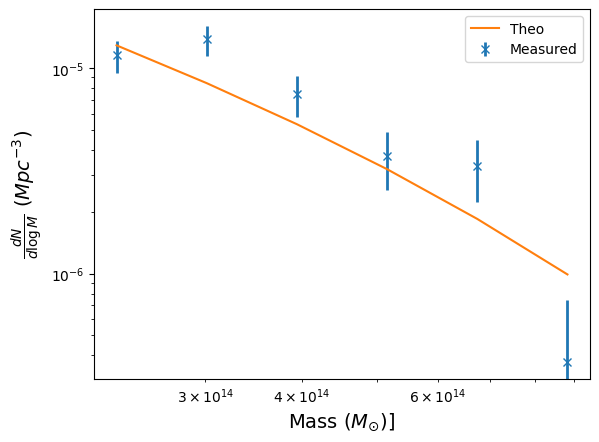

In [27]:
log_M_min=14.3 #minimal mass to plot the HMF
log_M_max=15 #maximal mass to plot HMF t
delta_log_M=0.1 
boxsize=BoxSize/0.67 #factor h

bin_centers, num_halos, err = halo_MF(haloM, log_M_min=log_M_min, log_M_max=log_M_max, delta_log_M=delta_log_M, boxsize = boxsize) #calculate halo mass function

fig,ax = plt.subplots()
ax.errorbar(bin_centers[num_halos!=0], num_halos[num_halos!=0], yerr=err[num_halos!=0], fmt='x', capthick=2, elinewidth=2,label='Measured') #plt HMF


HMF_T=mass_function.massFunction(bin_centers, 0.0, mdef = 'fof', model = 'sheth99',q_out = 'dndlnM')      #get theoretical line for HMF, 
#check https://bdiemer.bitbucket.io/colossus/lss_mass_function.html for a list of model
plt.loglog(bin_centers, HMF_T,label="Theo")



ax.set_xscale('log')
ax.set_yscale('log')

plt.legend()
plt.xlabel(r'Mass ($M_{\odot}$)]', fontsize = 14)
plt.ylabel(r'$\frac{dN}{d\log M}$ ($Mpc^{-3}$)', fontsize = 14)
